1. Perform Exploratory data analysis. (20)
○ What can you conclude from methods of central tendency and deviation of
the variables?
○ Are there any correlated variables?
○ Interpret the skewness of the variables.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read the data

C_Data = pd.read_csv("C:/cancer.csv")
C_Data


,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [2]:
#Summary of the data to see the statistics data
C_Data.describe()
#Here we got the statistics details of the data namely mean, std, percentile portions of the data

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<IPython.core.display.Javascript object>


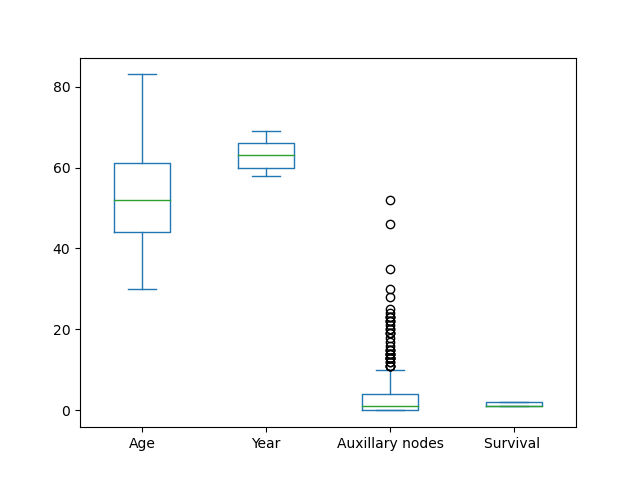

<AxesSubplot:>

In [4]:

C_Data.plot.box()

#From the plot graph below, there are outliers in the Aux nodes data which can be removed for further analysis


<IPython.core.display.Javascript object>


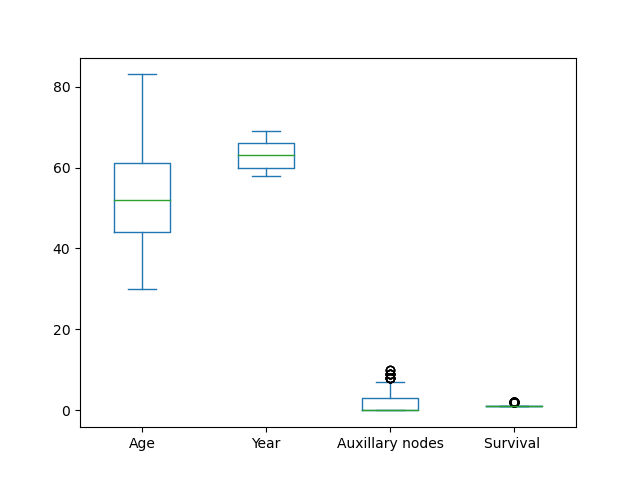

<AxesSubplot:>

In [5]:
#Remove the outliers in the aux nodes. Max = 75% + 1.5* (75%-25%)
%matplotlib notebook
max = 4+1.5*(4-0)
OC_Data = C_Data[C_Data["Auxillary nodes"] <= max]
OC_Data.plot.box()

#From the above operation, we are removing outliers and the transformed data - box plot is shown below

In [5]:
# Check for the correlation among the attributes
Correlated_Data = OC_Data.corr()
Correlated_Data

# From the below output it can be seen that the age, year and aux nodes are not correlated as the values are less than 0.8~0.9

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


<IPython.core.display.Javascript object>


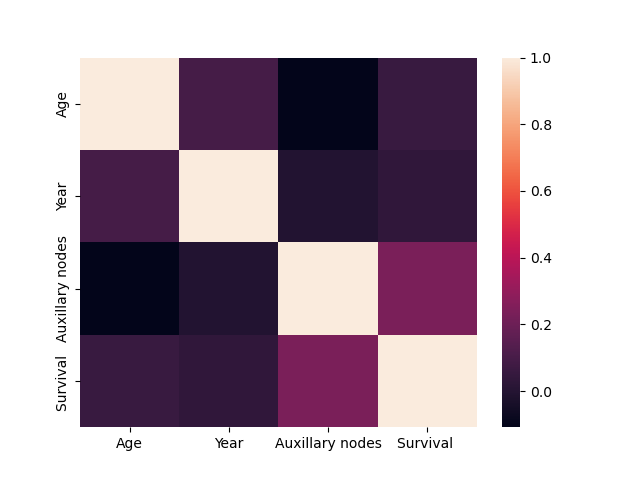

In [6]:
%matplotlib notebook
import seaborn as sns

sns.heatmap(Correlated_Data)
plt.show()

# No correlation value is noticed in the heatmap shown below. A variables are correlated if the value is high i..e more than 0.9

<IPython.core.display.Javascript object>


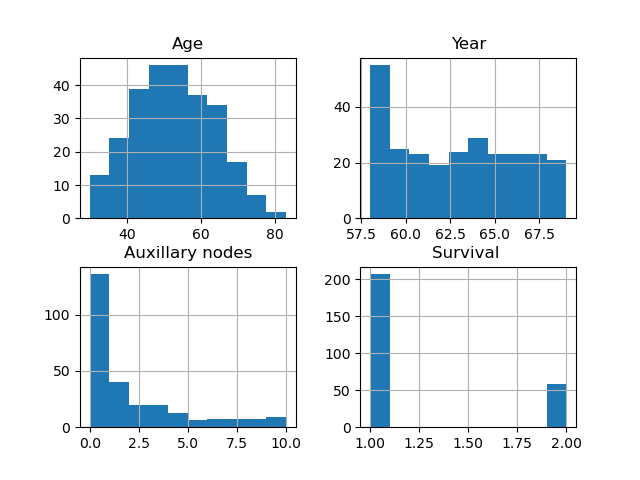

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

In [6]:
# Check for the data skewness witht the help of histogram plot of the data for all the variables

OC_Data.hist()

# From the below data, the aux node is having positive skew value. 

#We can transform the data to check if the skewness can be maintained

In [8]:

#One of the ways to transform the data of aux nodes is to perform Sqrt of the data 

OC_Data["Auxillary nodes"] = OC_Data["Auxillary nodes"]**(0.5)
OC_Data

C:\Users\BPAVAN~1\AppData\Local\Temp/ipykernel_3220/1265495355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OC_Data["Auxillary nodes"] = OC_Data["Auxillary nodes"]**(0.5)


,Age,Year,Auxillary nodes,Survival
0,30,62,1.732051,1
1,30,65,0.000000,1
2,31,59,1.414214,1
3,31,65,2.000000,1
4,33,58,3.162278,1
...,...,...,...,...
300,75,62,1.000000,1
301,76,67,0.000000,1
302,77,65,1.732051,1
303,78,65,1.000000,2


<IPython.core.display.Javascript object>


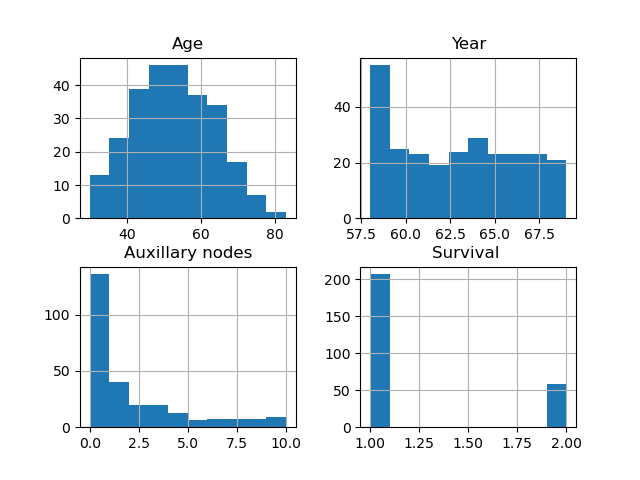

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

In [7]:
OC_Data.hist()

#It can be seen that even with SQRT of the data in the aux nodes column, the skewness cannot be changed.
# So we are reverting the changes and check for standardization and normalization

In [8]:
OC_Data["Auxillary nodes"] = OC_Data["Auxillary nodes"]**(2)
OC_Data

#Data reverted to previous

C:\Users\BPAVAN~1\AppData\Local\Temp/ipykernel_2968/996550237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OC_Data["Auxillary nodes"] = OC_Data["Auxillary nodes"]**(2)


,Age,Year,Auxillary nodes,Survival
0,30,62,9,1
1,30,65,0,1
2,31,59,4,1
3,31,65,16,1
4,33,58,100,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,9,1
303,78,65,1,2


In [9]:
#importing StandardScaler (standardization) and MinMaxScaler (Normalization) from sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()


#Transforming the data with fit operation and transform operation together

scaled = scaler.fit_transform(OC_Data)

#converting the matrix data to a data frame by below operation: 

scaled_data = pd.DataFrame(scaled, columns = OC_Data.columns)
scaled_data

,Age,Year,Auxillary nodes,Survival
0,0.000000,0.363636,0.09,0.0
1,0.000000,0.636364,0.00,0.0
2,0.018868,0.090909,0.04,0.0
3,0.018868,0.636364,0.16,0.0
4,0.056604,0.000000,1.00,0.0
...,...,...,...,...
260,0.849057,0.363636,0.01,0.0
261,0.867925,0.818182,0.00,0.0
262,0.886792,0.636364,0.09,0.0
263,0.905660,0.636364,0.01,1.0


<IPython.core.display.Javascript object>


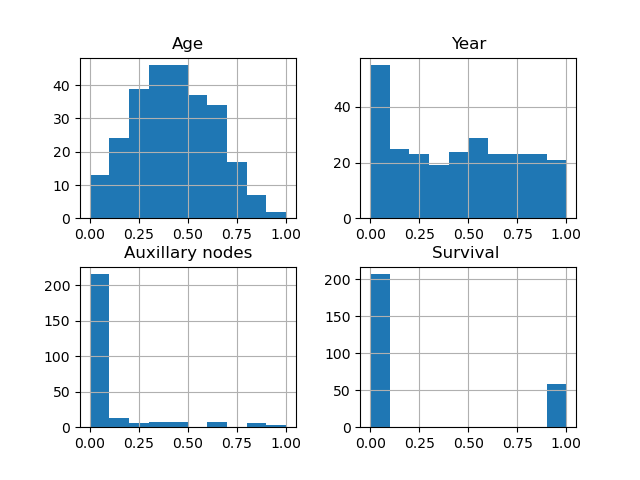

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

In [10]:
#Checking the hist from the new data scaled_data
scaled_data.hist()

#It can be seen that due to less number of data information, the skewness cannot be changed for aux nodes.
#Hence, we need to collect more data to perform the operations to get meaningful outputs

2. Develop Supervised learning models. (50)
○ Logistic Regression
○ Random Forest
○ Support Vector Machine
○ Neural Network

Compare the 4 methods based on the performance metrics and identify the best
model for this problem.
- Use 10 - fold cross validation.
- Use GridSearchCV for searching through hyper parameters.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay


In [5]:
# Import data

data = pd.read_csv("c:/cancer.csv")
data= data.rename(columns = {"Survival ": "Survival"}) # adjusting Column name without space

# Create features/inputs
X = data.drop(columns = ["Survival"])

# Create the output/class
y = data["Survival"]

# Splitting into training and testing datasets using KFold of 10 folds
kf = KFold()
KFold(n_splits=10)
for train_index, test_index in kf.split(data):
    
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    





In [15]:
# Classifier defination for Log reg

clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)

# Implement grid search for parameter tuning

parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),'penalty': (['l2']),'C':[100, 10, 1.0, 0.1, 0.01]}
# in Penalty, only l2 supports all the solver params hence only one penalty is used in the tuple.

clf_grid = GridSearchCV(clf, parameters)
clf_grid.fit(X_train, y_train)
clf_grid.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

0.7377049180327869
              precision    recall  f1-score   support

           1       0.76      0.93      0.84        45
           2       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61



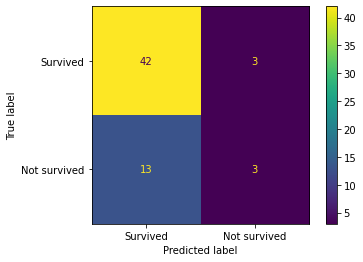

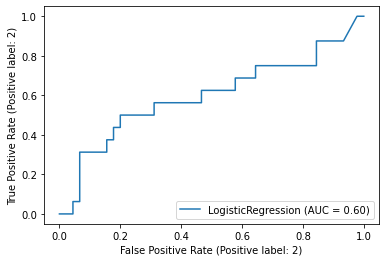

In [36]:
#Now we can re run the Log Reg with the help of suggested hyperparameters from above
# Logistic Regression

# Defining and training the model
clf = LogisticRegression(solver = "newton-cg", penalty = "l2", C = 100, random_state = 10).fit(X_train, y_train)

# Evaluating the model 
V1= clf.score(X_test, y_test)
print (V1)

# Making predictions
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

labels = ["Survived", "Not survived"]

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = clf.classes_))

# Plotting ROC curve
plot_roc_curve(clf, X_test, y_test) 
plt.show()


In [16]:
# Classifier defination for Random Forest

rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

# Implement grid search for parameter tuning

parameters = {'max_features':('sqrt', 'log2'),'n_estimators': [10, 100, 1000],'max_depth':[10]}
# in Penalty, only l2 supports all the solver params hence only one penalty is used in the tuple.

rf_grid = GridSearchCV(rf, parameters)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 10}

              precision    recall  f1-score   support

           1       0.76      0.91      0.83        45
           2       0.43      0.19      0.26        16

    accuracy                           0.72        61
   macro avg       0.59      0.55      0.54        61
weighted avg       0.67      0.72      0.68        61



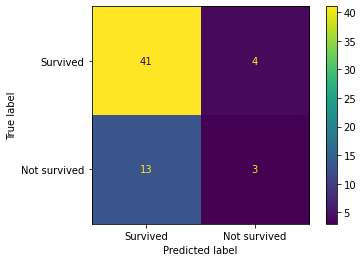

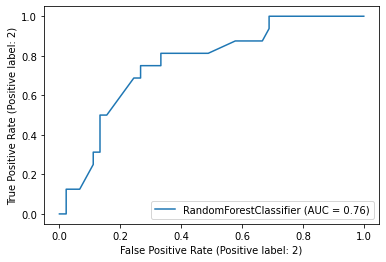

In [18]:
# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

# Making predictions
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))
plot_roc_curve(rf, X_test, y_test) 
plt.show()

In [12]:
# Classifier defination for Support Vector Machine

svm = SVC(random_state = 0, kernel = "rbf", gamma = 1, C=1).fit(X_train, y_train)

# Implement grid search for parameter tuning

parameters = {'gamma' : [100, 10, 1.0, 0.1], 'C' : [100, 10, 1.0, 0.1, 0.001]}

# Kernel tunning is not done as it is consuming more resource. 

# in Penalty, only l2 supports all the solver params hence only one penalty is used in the tuple.

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 0.1, 'gamma': 100}

C:\Users\B Pavan Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\B Pavan Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\B Pavan Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        45
           2       0.00      0.00      0.00        16

    accuracy                           0.74        61
   macro avg       0.37      0.50      0.42        61
weighted avg       0.54      0.74      0.63        61



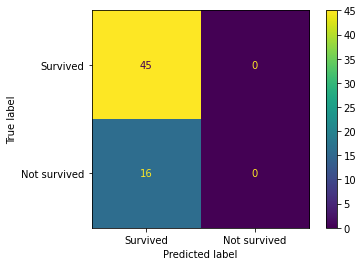

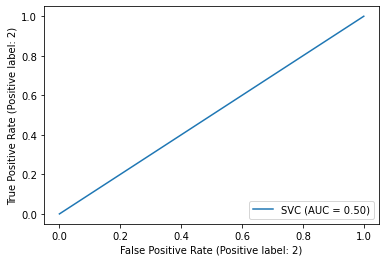

In [19]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "rbf", gamma = 100, C=0.1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))
plot_roc_curve(svm, X_test, y_test) 
plt.show()

In [14]:
# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

# Implement grid search for parameter tuning

parameters = {'solver':('lbfgs', 'sgd','adam'),'activation': ('identity', 'logistic', 'tanh', 'relu')}
# in Penalty, only l2 supports all the solver params hence only one penalty is used in the tuple.

nn_grid = GridSearchCV(nn, parameters)
nn_grid.fit(X_train, y_train)
nn_grid.best_params_



C:\Users\B Pavan Kumar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\B Pavan Kumar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\B Pavan Kumar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1)

{'activation': 'identity', 'solver': 'lbfgs'}

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        45
           2       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61



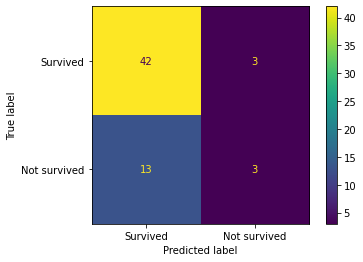

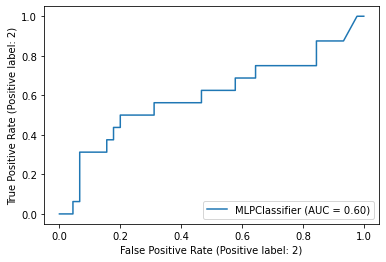

In [20]:
nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "identity", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))
plot_roc_curve(nn, X_test, y_test) 
plt.show()

Q3: Evaluate if the algorithms are overfitting?

In [37]:
# Implement k-fold cross validation
import statistics as s

# Specify the number of splits - 10
kf = KFold(n_splits=10)
Score = []


for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    V = clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])
#     print (V)
    Score.append(V)
print ("Average of Log Reg all 10 fold score is ", round(s.mean(Score),2))
       
# from the CLF algorithm, the score is 0.73 and average calculated is 0.76. Since both values are approximately same,
# the model is not overfitting.
    
#Similarly we can see that score values in RF is 0.73 and it is not overfitting

# Also, in SVM, score is 0.74 and it is not overfitting. As the score is not high i.e. more than 0.9 we can treat this as not overfitting

# and also, in NN, score is 0.74 and it is not overfitting. As the score is not high i.e. more than 0.9 we can treat this as not overfitting

Average of Log Reg all 10 fold score is  0.76


Q4: Develop a function which can implement machine learning. (20)
def machine_learning (data, algorithm):
…..
…..
plot ROC curve
return performance metrics
Function call: machine_learning (data, neural_network)

Select the ML from neural_network as nn, log_reg as clf, random_forest as rf, support vector machine as svm:nn


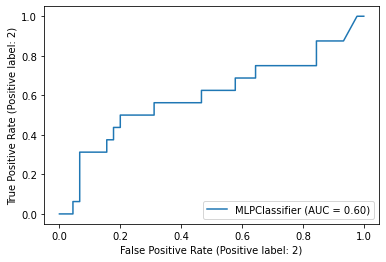

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        45
           2       0.50      0.19      0.27        16

    accuracy                           0.74        61
   macro avg       0.63      0.56      0.56        61
weighted avg       0.69      0.74      0.69        61



In [31]:

#reading the data
data = pd.read_csv("c:/cancer.csv")
data= data.rename(columns = {"Survival ": "Survival"}) # adjusting Column name without space

# defining function

def machine_learning (data, algorithm):

        X = data.drop(columns = ["Survival"])
        y = data["Survival"]
        kf = KFold()
        KFold(n_splits=10)
        for train_index, test_index in kf.split(data):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        if algorithm == 'nn':
            model = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "identity", learning_rate_init = 0.01).fit(X_train, y_train)
        elif algorithm == 'clf':
            model = LogisticRegression(solver = "newton-cg", penalty = "l2", C = 100, random_state = 10).fit(X_train, y_train)
        elif algorithm == 'rf':
            model = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)
        elif algorithm == 'svm':
            model = svm = SVC(random_state = 0, kernel = "rbf", gamma = 100, C=0.1).fit(X_train, y_train)
        pred = model.predict(X_test)
        cm = confusion_matrix(y_test, pred, labels = clf.classes_)
        plot_roc_curve(model, X_test, y_test) 
        plt.show()
        disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)

        performance = print(classification_report(y_test, pred, labels = clf.classes_))
        return performance

ML= input('Select the ML from neural_network as nn, log_reg as clf, random_forest as rf, support vector machine as svm:')

machine_learning (data, ML)